**MNIST DATASET**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, MaxPooling2D, Conv2D
from keras.utils import to_categorical

In [2]:
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = mnist.load_data()

print(train_images_mnist.shape, test_images_mnist.shape)
print(train_labels_mnist.shape, test_labels_mnist.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


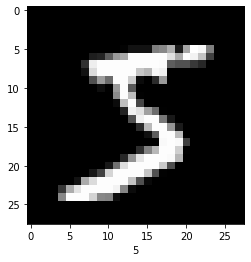

In [3]:
plt.figure()
plt.imshow(train_images_mnist[0], cmap='binary_r')
plt.grid(False)
plt.xlabel(train_labels_mnist[0])
plt.show()

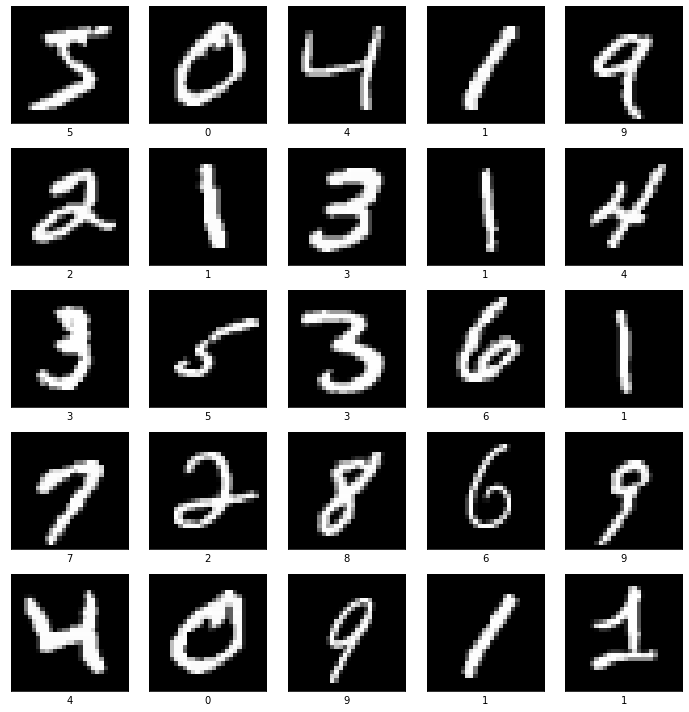

In [4]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images_mnist[i], cmap=plt.cm.binary_r)
  plt.xlabel(train_labels_mnist[i])
  plt.tight_layout()
plt.show()

In [5]:
train_images_mnist = train_images_mnist.astype('float32')/255.0
test_images_mnist = test_images_mnist.astype('float32')/255.0

In [6]:
train_images_mnist = train_images_mnist.reshape((train_images_mnist.shape[0], 28, 28, 1))
test_images_mnist = test_images_mnist.reshape((test_images_mnist.shape[0], 28, 28, 1))

In [7]:
train_labels_mnist = to_categorical(train_labels_mnist)
test_labels_mnist = to_categorical(test_labels_mnist)

In [8]:
model_mnist = Sequential()

model_mnist.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)))
model_mnist.add(MaxPooling2D((2,2), strides=2, padding='same'))


model_mnist.add(Conv2D(128, (3,3), activation = 'relu'))
model_mnist.add(MaxPooling2D((2,2), strides=2, padding='same'))

model_mnist.add(Conv2D(256, (3,3), activation = 'relu'))
model_mnist.add(MaxPooling2D((2,2), strides=2, padding='same'))


model_mnist.add(Flatten())
model_mnist.add(Dense(10, activation='softmax'))

model_mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [9]:
model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history_mnist = model_mnist.fit(train_images_mnist, train_labels_mnist, epochs=30, validation_split=0.2, batch_size=32)

Epoch 1/30
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1265 - accuracy: 0.9601 - val_loss: 0.0561 - val_accuracy: 0.9825
Epoch 2/30
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0381 - val_accuracy: 0.9891
Epoch 3/30
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.0367 - val_accuracy: 0.9898
Epoch 4/30
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0477 - val_accuracy: 0.9852
Epoch 5/30
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0396 - val_accuracy: 0.9894
Epoch 6/30
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0368 - val_accuracy: 0.9904
Epoch 7/30
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0651 -

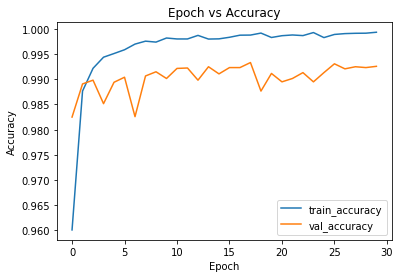

In [11]:
plt.plot(history_mnist.history['accuracy'], label='train_accuracy')
plt.plot(history_mnist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend(loc='best')

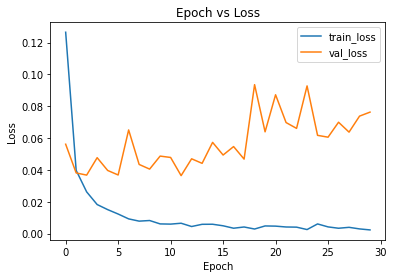

In [12]:
plt.plot(history_mnist.history['loss'], label='train_loss')
plt.plot(history_mnist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend(loc='best')

In [13]:
model_mnist.evaluate(test_images_mnist, test_labels_mnist, verbose = 1)

313/313 [==============================] - 2s 6ms/step - loss: 0.0728 - accuracy: 0.9927


[0.0728297084569931, 0.9926999807357788]

Enter an Image Index(Max 10000): 26
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[7]


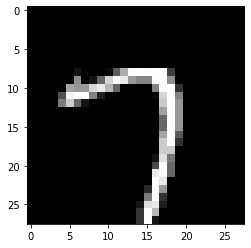

In [14]:
image_index = int(input("Enter an Image Index(Max 10000): "))

plt.imshow(test_images_mnist[image_index].reshape(28, 28),cmap='gray')
pred = model_mnist.predict_classes(test_images_mnist[image_index].reshape(1, 28, 28,1))
print(pred)

**FASHION MNIST DATASET**

In [15]:
from keras.datasets import fashion_mnist

In [16]:
(train_images_fmnist, train_labels_fmnist), (test_images_fmnist, test_labels_fmnist) = fashion_mnist.load_data()

train_images_fmnist.shape, test_images_fmnist.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [17]:
train_images_fmnist = train_images_fmnist.astype('float32')/255.0
test_images_fmnist = test_images_fmnist.astype('float32')/255.0

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

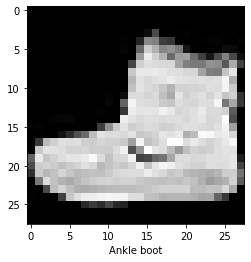

In [19]:
plt.figure()
plt.imshow(train_images_fmnist[0], cmap=plt.cm.binary_r)
plt.grid(False)
plt.xlabel(class_names[train_labels_fmnist[0]])
plt.show()

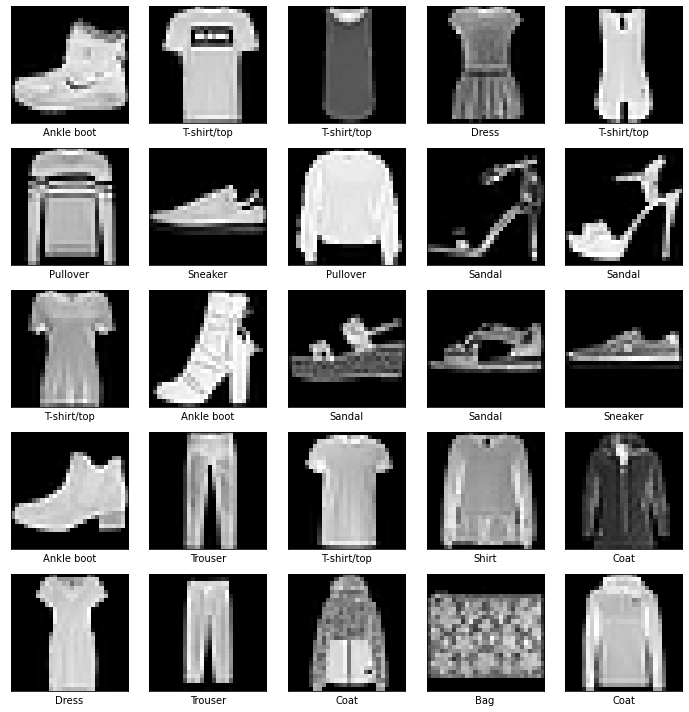

In [20]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images_fmnist[i], cmap=plt.cm.binary_r)
  plt.xlabel(class_names[train_labels_fmnist[i]])
  plt.tight_layout()
plt.show()

In [21]:
train_labels_fmnist = to_categorical(train_labels_fmnist)
test_labels_fmnist = to_categorical(test_labels_fmnist)

In [22]:
train_images_fmnist = train_images_fmnist.reshape((train_images_fmnist.shape[0], 28, 28, 1))
test_images_fmnist = test_images_fmnist.reshape((test_images_fmnist.shape[0], 28, 28, 1))

In [23]:
model_fmnist = Sequential()

model_fmnist.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape = (28,28,1), kernel_initializer='glorot_normal'))

model_fmnist.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))

model_fmnist.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))

model_fmnist.add(MaxPooling2D(pool_size=(2,2), strides=2))

model_fmnist.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))

model_fmnist.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))

model_fmnist.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))

model_fmnist.add(MaxPooling2D(pool_size=(2,2), strides=2))

model_fmnist.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))

model_fmnist.add(Dropout(0.2))
model_fmnist.add(Flatten())

model_fmnist.add(Dense(256, activation='relu'))
model_fmnist.add(Dense(10, activation='softmax'))

model_fmnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)       

In [24]:
model_fmnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor="val_loss",
    factor=0.1,
    patience=8,
    verbose=0,
    mode="min",
    min_delta=0.0001,
    min_lr=0)

In [26]:
history_fmnist = model_fmnist.fit(train_images_fmnist, train_labels_fmnist, epochs=50, validation_split=0.3, callbacks=[reduce_lr], batch_size=32)

Epoch 1/50
1313/1313 [==============================] - 19s 14ms/step - loss: 0.4282 - accuracy: 0.8451 - val_loss: 0.3024 - val_accuracy: 0.8902
Epoch 2/50
1313/1313 [==============================] - 18s 14ms/step - loss: 0.2737 - accuracy: 0.8992 - val_loss: 0.2461 - val_accuracy: 0.9115
Epoch 3/50
1313/1313 [==============================] - 18s 14ms/step - loss: 0.2296 - accuracy: 0.9144 - val_loss: 0.2460 - val_accuracy: 0.9077
Epoch 4/50
1313/1313 [==============================] - 18s 14ms/step - loss: 0.2020 - accuracy: 0.9244 - val_loss: 0.2538 - val_accuracy: 0.9056
Epoch 5/50
1313/1313 [==============================] - 18s 14ms/step - loss: 0.1718 - accuracy: 0.9369 - val_loss: 0.2385 - val_accuracy: 0.9154
Epoch 6/50
1313/1313 [==============================] - 18s 14ms/step - loss: 0.1478 - accuracy: 0.9436 - val_loss: 0.2273 - val_accuracy: 0.9214
Epoch 7/50
1313/1313 [==============================] - 18s 14ms/step - loss: 0.1269 - accuracy: 0.9530 - val_loss: 0.2439 -

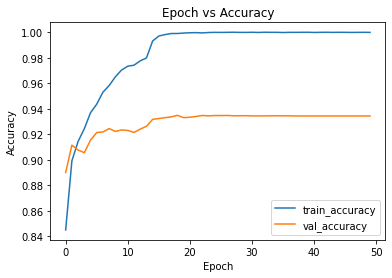

In [27]:
plt.plot(history_fmnist.history['accuracy'], label='train_accuracy')
plt.plot(history_fmnist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend(loc='best')

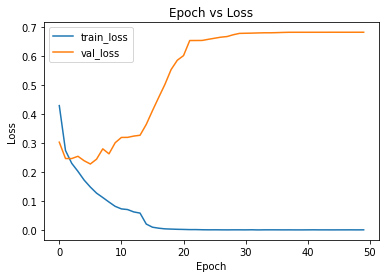

In [28]:
plt.plot(history_fmnist.history['loss'], label='train_loss')
plt.plot(history_fmnist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend(loc='best')

In [29]:
model_fmnist.evaluate(test_images_fmnist, test_labels_fmnist, verbose = 1)

313/313 [==============================] - 2s 5ms/step - loss: 0.7836 - accuracy: 0.9270


[0.783592939376831, 0.9269999861717224]

Enter an Image Index(Max 10000): 786
[8]


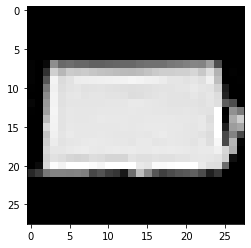

In [30]:
image = int(input("Enter an Image Index(Max 10000): "))

plt.imshow(test_images_fmnist[image].reshape(28, 28),cmap='gray')
pred = model_fmnist.predict_classes(test_images_fmnist[image].reshape(1, 28, 28,1))
print(pred)

**CIFAR-100 DATASET**

In [31]:
from keras.datasets import cifar100

In [32]:
(train_images_cifar100, train_labels_cifar100), (test_images_cifar100, test_labels_cifar100) = cifar100.load_data()

print(train_images_cifar100.shape, test_images_cifar100.shape)
print(train_labels_cifar100.shape, test_labels_cifar100.shape)

169009152/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [33]:
train_labels_cifar100 = to_categorical(train_labels_cifar100)
test_labels_cifar100 = to_categorical(test_labels_cifar100)

In [34]:
print(train_images_cifar100.shape, test_images_cifar100.shape)
print(train_labels_cifar100.shape, test_labels_cifar100.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 100) (10000, 100)


In [35]:
train_images_cifar100 = train_images_cifar100.astype('float32')/255.0
test_images_cifar100 = test_images_cifar100.astype('float32')/255.0

In [37]:
model_cifar100 = Sequential()

model_cifar100.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape = (32,32,3), kernel_initializer='glorot_normal'))

model_cifar100.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))

model_cifar100.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))

model_cifar100.add(MaxPooling2D(pool_size=(2,2), strides=2))

model_cifar100.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))

model_cifar100.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))

model_cifar100.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))

model_cifar100.add(MaxPooling2D(pool_size=(2,2), strides=2))

model_cifar100.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu', kernel_initializer='glorot_normal'))


model_cifar100.add(Flatten())

model_cifar100.add(Dropout(0.3))
model_cifar100.add(Dense(256, activation='relu'))
model_cifar100.add(Dense(100, activation='softmax'))

model_cifar100.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)       

In [38]:
model_cifar100.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor="val_loss",
    factor=0.1,
    patience=8,
    verbose=0,
    mode="min",
    min_delta=0.0001,
    min_lr=0)

In [40]:
history_cifar100 = model_cifar100.fit(train_images_cifar100, train_labels_cifar100, epochs=200, validation_split=0.2, callbacks=[reduce_lr], batch_size=32)

Epoch 1/200
1250/1250 [==============================] - 20s 16ms/step - loss: 4.0530 - accuracy: 0.0765 - val_loss: 3.6298 - val_accuracy: 0.1430
Epoch 2/200
1250/1250 [==============================] - 19s 15ms/step - loss: 3.3275 - accuracy: 0.1981 - val_loss: 3.1874 - val_accuracy: 0.2317
Epoch 3/200
1250/1250 [==============================] - 20s 16ms/step - loss: 2.9178 - accuracy: 0.2776 - val_loss: 2.9668 - val_accuracy: 0.2734
Epoch 4/200
1250/1250 [==============================] - 19s 15ms/step - loss: 2.5930 - accuracy: 0.3388 - val_loss: 2.9112 - val_accuracy: 0.2986
Epoch 5/200
1250/1250 [==============================] - 19s 15ms/step - loss: 2.3193 - accuracy: 0.3972 - val_loss: 2.9016 - val_accuracy: 0.3118
Epoch 6/200
1250/1250 [==============================] - 19s 15ms/step - loss: 2.0662 - accuracy: 0.4529 - val_loss: 2.9035 - val_accuracy: 0.3198
Epoch 7/200
1250/1250 [==============================] - 19s 15ms/step - loss: 1.8092 - accuracy: 0.5116 - val_loss: 2

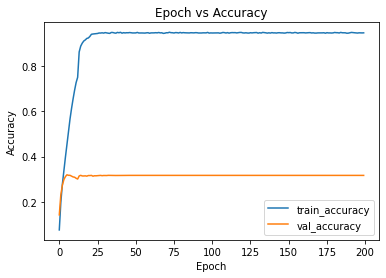

In [41]:
plt.plot(history_cifar100.history['accuracy'], label='train_accuracy')
plt.plot(history_cifar100.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend(loc='best')

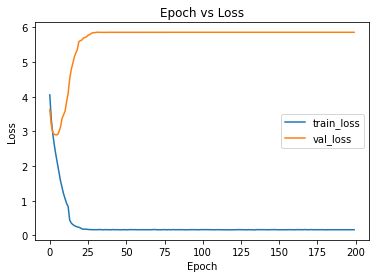

In [42]:
plt.plot(history_cifar100.history['loss'], label='train_loss')
plt.plot(history_cifar100.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend(loc='best')

In [43]:
model_cifar100.evaluate(test_images_cifar100, test_labels_cifar100, verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 5.7714 - accuracy: 0.3259


[5.771366119384766, 0.32589998841285706]